Poniższy kod był realizowany w pythonie wersji 3.11. Wymaga tego biblioteka tensorflow.

In [26]:
import pandas as pd

parquet_path = "Crime_Data.parquet"
df = pd.read_parquet(parquet_path)
print(f"\nWczytano {len(df)} wierszy z Parquet.")

# Przyda się później do zdenormalizowania danych
lat_min, lat_max = df['LAT'].min(), df['LAT'].max()
lon_min, lon_max = df['LON'].min(), df['LON'].max()
age_min, age_max = df['Vict Age'].min(), df['Vict Age'].max()

print(f"age_max: {age_max}")
print(f"age_min: {age_min}")
print(f"lat_max: {lat_max}")
print(f"lat_min: {lat_min}")
print(f"lon_max: {lon_max}")
print(f"lon_min: {lon_min}")
print(f"parquet_path: {parquet_path}")


Wczytano 1003448 wierszy z Parquet.
age_max: 99
age_min: -1
lat_max: 34.3343
lat_min: 0
lon_max: 0
lon_min: -118.1554
parquet_path: Crime_Data.parquet


In [27]:
import pandas as pd

parquet_path = "Cleaned_Crime_Data.parquet"
df = pd.read_parquet(parquet_path)
print(f"\nWczytano {len(df)} wierszy z Parquet.")


Wczytano 1003448 wierszy z Parquet.


In [28]:
print("\n--- Info DataFrame (Pandas) ---")
print(df.info())

print("\n--- Statystyki opisowe (AREA) ---")
print(df['AREA'].describe())


--- Info DataFrame (Pandas) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003448 entries, 0 to 1003447
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   DR_NO         1003448 non-null  string 
 1   Date Rptd     1003448 non-null  string 
 2   DATE OCC      1003448 non-null  string 
 3   TIME OCC      1003448 non-null  string 
 4   AREA          1003448 non-null  string 
 5   AREA NAME     1003448 non-null  string 
 6   Rpt Dist No   1003448 non-null  string 
 7   Part 1-2      1003448 non-null  string 
 8   Crm Cd        1003448 non-null  string 
 9   Crm Cd Desc   1003448 non-null  string 
 10  Mocodes       851881 non-null   string 
 11  Vict Age      1003448 non-null  float64
 12  Vict Sex      858856 non-null   string 
 13  Vict Descent  858844 non-null   string 
 14  Premis Cd     1003432 non-null  string 
 15  Premis Desc   1002860 non-null  string 
 16  Status        1003447 non-null  string 

In [29]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,M,O,101,STREET,AA,Adult Arrest,510,1900 S LONGWOOD AV,0.991356,0.002671
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,...,M,O,128,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330,1000 S FLOWER ST,0.991557,0.003411
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,X,X,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480,1400 W 37TH ST,0.990875,0.003096
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,M,O,405,CLOTHING STORE,IC,Invest Cont,343,14000 RIVERSIDE DR,0.994854,0.001929
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,0630,04,Hollenbeck,0413,1,510,VEHICLE - STOLEN,...,<NA>,<NA>,101,STREET,IC,Invest Cont,510,200 E AVENUE 28,0.992652,0.003831


In [30]:
# Zamiana kolumn z datami na typ datetime
date_columns = ['Date Rptd', 'DATE OCC']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print(df.dtypes)

C:\Users\piotr\AppData\Local\Temp\ipykernel_17728\1436727058.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


DR_NO           string[python]
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC        string[python]
AREA            string[python]
AREA NAME       string[python]
Rpt Dist No     string[python]
Part 1-2        string[python]
Crm Cd          string[python]
Crm Cd Desc     string[python]
Mocodes         string[python]
Vict Age               float64
Vict Sex        string[python]
Vict Descent    string[python]
Premis Cd       string[python]
Premis Desc     string[python]
Status          string[python]
Status Desc     string[python]
Crm Cd 1        string[python]
LOCATION        string[python]
LAT                    float64
LON                    float64
dtype: object


C:\Users\piotr\AppData\Local\Temp\ipykernel_17728\1436727058.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


Wykres przedstawiająccy ilość przestępstw w zależności od pory dnia. Nie ma on wiele wspólnego z naszym projektem, ale byłem ciekaw. Wysoka ilość przestępstw o godzinie 12 wynika prawdopodobnie z faktu dopisywania tam przestępstw, które nie wiadomo kiedy ostały popełnione.

C:\Users\piotr\AppData\Local\Temp\ipykernel_17728\347045331.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_labels, y=crime_counts_by_hour.values, palette='viridis')


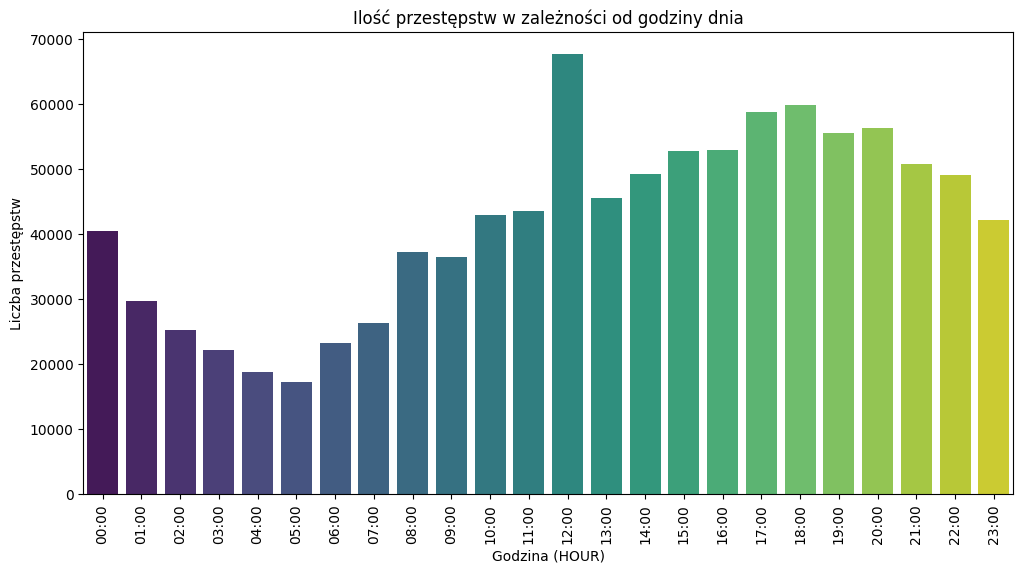

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting TIME OCC to integers
df['TIME OCC'] = df['TIME OCC'].astype(int)

# Grouping data by hour of the day and counting the number of crimes
crime_counts_by_hour = (df['TIME OCC'] // 100).value_counts().sort_index()

# Converting indices to time format
hour_labels = [
    f"{str(hour).zfill(2)}:00" for hour in crime_counts_by_hour.index]

# Plotting the number of crimes by hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_labels, y=crime_counts_by_hour.values, palette='viridis')
plt.xlabel('Godzina (HOUR)')
plt.ylabel('Liczba przestępstw')
plt.title('Ilość przestępstw w zależności od godziny dnia')
plt.xticks(rotation=90)
plt.show()

In [32]:
import numpy as np
# Przygotowanie danych
data = df[['LAT', 'LON', 'Vict Age']].astype(
    np.float32).values  # Ensure data is of type float32

In [33]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LeakyReLU


# Parametry modelu
latent_dim = 100
data_dim = data.shape[1]

# Generator


def build_generator(latent_dim, data_dim):
    model = tf.keras.Sequential([
        layers.Dense(128, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        layers.Dense(256),
        LeakyReLU(alpha=0.2),
        layers.Dense(512),
        LeakyReLU(alpha=0.2),
        # Zakładając, że dane są znormalizowane do zakresu [-1, 1]
        layers.Dense(data_dim, activation='tanh')
    ])
    return model

# Dyskryminator


def build_discriminator(data_dim):
    model = tf.keras.Sequential([
        layers.Dense(256, activation='relu', input_dim=data_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


# Kompilacja modeli
generator = build_generator(latent_dim, data_dim)
discriminator = build_discriminator(data_dim)
discriminator.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# GAN
discriminator.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Trening GAN


def train_gan(gan, generator, discriminator, data, epochs=10000, batch_size=64):
    for epoch in range(epochs):
        # Trening dyskryminatora
        real_data = data[np.random.randint(0, data.shape[0], batch_size)]
        noise = np.random.normal(
            0, 1, (batch_size, latent_dim)).astype(np.float32)
        fake_data = generator.predict(noise)
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        # Trening generatora
        noise = np.random.normal(
            0, 1, (batch_size, latent_dim)).astype(np.float32)
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        if epoch % 1000 == 0:
            print(
                f"Epoch {epoch} - D Loss: {d_loss[0]}, D Acc: {d_loss[1]}, G Loss: {g_loss}")


# Uruchomienie treningu
train_gan(gan, generator, discriminator, data, epochs=1000)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


c:\Users\piotr\Documents\python\DZD\pyt311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\piotr\Documents\python\DZD\pyt311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\piotr\Documents\python\DZD\pyt311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0 - D Loss: 0.7348440289497375, D Acc: 0.25, G Loss: 0.70233154296875
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━

Spróbujmy używając naszego modelu zgadnąć gdzie pojawią się następne przestępstwa.

In [34]:
# Generowanie nowych próbek danych za pomocą wytrenowanego generatora
num_samples = 10  # Liczba próbek do wygenerowania
noise = np.random.normal(0, 1, (num_samples, latent_dim)).astype(np.float32)
generated_samples = generator.predict(noise)

# Konwersja zmiennych na float
lat_min_f = float(lat_min)
lat_max_f = float(lat_max)
lon_min_f = float(lon_min)
lon_max_f = float(lon_max)
age_min_f = float(age_min)
age_max_f = float(age_max)

# Zdenormalizowanie danych
generated_samples[:, 0] = generated_samples[:, 0] * \
    (lat_max_f - lat_min_f) + lat_min_f
generated_samples[:, 1] = generated_samples[:, 1] * \
    (lon_max_f - lon_min_f) + lon_min_f
generated_samples[:, 2] = generated_samples[:, 2] * \
    (age_max_f - age_min_f) + age_min_f

# Konwersja wygenerowanych próbek do DataFrame
generated_df = pd.DataFrame(generated_samples, columns=[
                            'LAT', 'LON', 'Vict Age'])

# Wyświetlenie wygenerowanych próbek
print(generated_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
         LAT         LON   Vict Age
0 -34.245831 -150.985168 -37.238319
1 -34.261600 -151.083588 -37.147137
2 -34.259735 -150.584579 -36.491413
3 -34.317196 -150.831070 -39.656921
4 -34.289322 -149.940247 -39.828072
5 -34.302490 -149.253143 -37.148006
6 -34.316425 -150.726471 -38.185329
7 -34.307812 -152.839905 -37.284603
8 -34.293865 -151.410248 -36.191059
9 -34.272240 -150.559906 -38.599667


I jak widzimy otrzymujemy bzdury. Jeśli są jakieś wątpliwości to wygenerowana szerokość i wysokość to środek oceanu spokojnego. A ofiarą przestępstwa będzie miała ujemny wiek. Zajmijmy się najpierw koordynatami.

In [35]:
import pandas as pd

parquet_path = "Crime_Data.parquet"
df = pd.read_parquet(parquet_path)
print(f"\nWczytano {len(df)} wierszy z Parquet.")


Wczytano 1003448 wierszy z Parquet.


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


# Grouping data by LAT and counting the number of crimes
crime_counts_by_lat_bins = df['LAT'].value_counts().sort_index()
print(crime_counts_by_lat_bins)

# # Plotting the number of crimes by LAT
# plt.figure(figsize=(12, 6))
# sns.barplot(x=crime_counts_by_lat_bins.index,
#             y=crime_counts_by_lat_bins.values, palette='viridis')
# plt.xlabel('Przedział szerokości geograficznej (LAT)')
# plt.ylabel('Liczba przestępstw')
# plt.title('Ilość przestępstw w zależności od szerokości geograficznej')
# plt.xticks(rotation=90)
# plt.show()

LAT
0          2240
33.7059       1
33.7061       2
33.7064      15
33.7065       4
           ... 
34.3292       3
34.3293       1
34.3297       3
34.333        1
34.3343       2
Name: count, Length: 5425, dtype: Int64


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


# Grouping data by LON and counting the number of crimes
crime_counts_by_lat_bins = df['LON'].value_counts().sort_index()

print(crime_counts_by_lat_bins)
# # Plotting the number of crimes by LON
# plt.figure(figsize=(12, 6))
# sns.barplot(x=crime_counts_by_lat_bins.index,
#             y=crime_counts_by_lat_bins.values, palette='viridis')
# plt.xlabel('Przedział długości geograficznej (LON)')
# plt.ylabel('Liczba przestępstw')
# plt.title('Ilość przestępstw w zależności od długości geograficznej')
# plt.xticks(rotation=90)
# plt.show()

LON
-118.1554       4
-118.156       25
-118.1568       1
-118.1569       1
-118.1574       2
             ... 
-118.6666       1
-118.6672       3
-118.6673      12
-118.6676       6
0            2240
Name: count, Length: 4981, dtype: Int64


Vict Age
-1        99
-2        28
-3         5
-4         3
0     268921
       ...  
95        99
96        95
97        72
98        71
99       354
Name: count, Length: 104, dtype: Int64


C:\Users\piotr\AppData\Local\Temp\ipykernel_17728\545303057.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts_by_lat_bins.index,


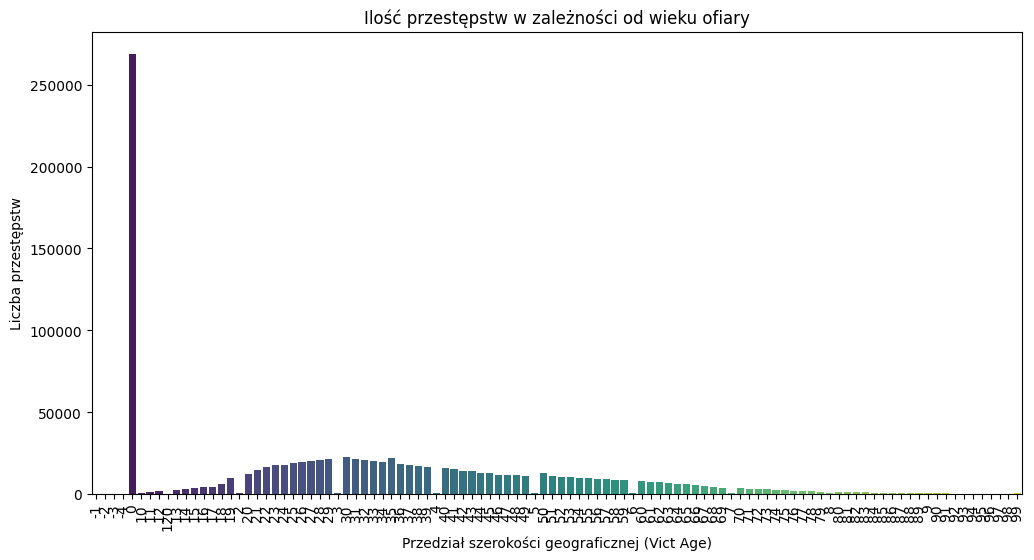

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


# Grouping data by LAT and counting the number of crimes
crime_counts_by_lat_bins = df['Vict Age'].value_counts().sort_index()
print(crime_counts_by_lat_bins)

# Plotting the number of crimes by Vict Age
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_counts_by_lat_bins.index,
            y=crime_counts_by_lat_bins.values, palette='viridis')
plt.xlabel('Przedział szerokości geograficznej (Vict Age)')
plt.ylabel('Liczba przestępstw')
plt.title('Ilość przestępstw w zależności od wieku ofiary')
plt.xticks(rotation=90)
plt.show()

Jak widać z wykresów, brakujące dane są w naszej bazie danych ukryte pod wartościami 0 dla lat i lon.

Dla wartości vict age. Nie jest to oczywiste w jaki sposób inetrpretować dane -4,-3,-2,-1,0. Osoby poniżej pierwszego roku życia również mogą być ofiarami przestępstwa, jednak w naszym przypadku potraktujemy wszystkie dane poniżej jeden jako błędne i odrzucimy je.

In [39]:
# Convert columns to numeric types
df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
df['LON'] = pd.to_numeric(df['LON'], errors='coerce')
df['Vict Age'] = pd.to_numeric(df['Vict Age'], errors='coerce')

# Filter out rows where LAT or LON are 0, and Vict Age is 0 or lower
filtered_df = df[(df['LAT'] != 0) & (df['LON'] != 0) & (df['Vict Age'] > 0)]

# Prepare the data for the model
data = filtered_df[['LAT', 'LON', 'Vict Age']].astype(np.float32).values

# Update the min and max values for normalization
lat_min, lat_max = filtered_df['LAT'].min(), filtered_df['LAT'].max()
lon_min, lon_max = filtered_df['LON'].min(), filtered_df['LON'].max()
age_min, age_max = filtered_df['Vict Age'].min(), filtered_df['Vict Age'].max()

# Normalize the data
data[:, 0] = (data[:, 0] - lat_min) / (lat_max - lat_min) * 2 - 1
data[:, 1] = (data[:, 1] - lon_min) / (lon_max - lon_min) * 2 - 1
data[:, 2] = (data[:, 2] - age_min) / (age_max - age_min) * 2 - 1

# Reinitialize the models
generator = build_generator(latent_dim, data_dim)
discriminator = build_discriminator(data_dim)
discriminator.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reinitialize the GAN
discriminator.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Train the GAN model with the filtered data
train_gan(gan, generator, discriminator, data)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


c:\Users\piotr\Documents\python\DZD\pyt311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\piotr\Documents\python\DZD\pyt311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\piotr\Documents\python\DZD\pyt311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0 - D Loss: 0.6983497142791748, D Acc: 0.3046875, G Loss: 0.7049494385719299
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━

In [40]:
# Generowanie nowych próbek danych za pomocą wytrenowanego generatora
num_samples = 10  # Liczba próbek do wygenerowania
noise = np.random.normal(0, 1, (num_samples, latent_dim)).astype(np.float32)
generated_samples = generator.predict(noise)

# Konwersja zmiennych na float
lat_min_f = float(lat_min)
lat_max_f = float(lat_max)
lon_min_f = float(lon_min)
lon_max_f = float(lon_max)
age_min_f = float(age_min)
age_max_f = float(age_max)

# Zdenormalizowanie danych
generated_samples[:, 0] = generated_samples[:, 0] * \
    (lat_max_f - lat_min_f) + lat_min_f
generated_samples[:, 1] = generated_samples[:, 1] * \
    (lon_max_f - lon_min_f) + lon_min_f
generated_samples[:, 2] = generated_samples[:, 2] * \
    (age_max_f - age_min_f) + age_min_f

# Konwersja wygenerowanych próbek do DataFrame
generated_df = pd.DataFrame(generated_samples, columns=[
                            'LAT', 'LON', 'Vict Age'])

# Wyświetlenie wygenerowanych próbek
print(generated_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
         LAT         LON    Vict Age
0  33.829498 -118.408562  119.999344
1  33.829742 -118.408951  119.999496
2  33.829315 -118.408836  119.999352
3  33.829811 -118.408440  119.999771
4  33.829704 -118.408798  119.999672
5  33.830006 -118.408478  119.999413
6  33.829777 -118.408875  119.999283
7  33.830025 -118.408882  119.999435
8  33.829578 -118.408813  119.999596
9  33.829681 -118.408928  119.999680


I jak widać model wskazuje nam miejsca w Los Angeles i wiek ofiary (choć dalej absurdalny-skrarjnie, mały lub duży)

In [2]:
# Model generujący wiek ofiary przestępstwa
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
parquet_path = "Crime_Data.parquet"
df = pd.read_parquet(parquet_path)

# Convert columns to numeric types
df['Vict Age'] = pd.to_numeric(df['Vict Age'], errors='coerce')

# Filter out rows where Vict Age is 0 or lower
filtered_df = df[df['Vict Age'] > 0]

# Prepare the data for the Vict Age model
age_data = filtered_df[['Vict Age']].astype(np.float32).values

# Normalize the age data
age_min, age_max = age_data.min(), age_data.max()
normalized_age_data = (age_data - age_min) / (age_max - age_min) * 2 - 1

# Define the model
age_model = Sequential([
    Dense(64, input_dim=1, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='tanh')  # Assuming the data is normalized to [-1, 1]
])

# Compile the model
age_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
age_model.fit(normalized_age_data, normalized_age_data,
              epochs=100, batch_size=32)

# Save the age model
age_model.save('age_model.h5')

print("Age model created and saved successfully.")

Epoch 1/100


c:\Users\piotr\Documents\python\DZDgit\DuzeZbioryDanych\pyt311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22950/22950 ━━━━━━━━━━━━━━━━━━━━ 23s 954us/step - loss: 0.0011
Epoch 2/100
22950/22950 ━━━━━━━━━━━━━━━━━━━━ 21s 911us/step - loss: 2.5879e-06
Epoch 3/100
22950/22950 ━━━━━━━━━━━━━━━━━━━━ 21s 918us/step - loss: 1.8040e-06
Epoch 4/100
22950/22950 ━━━━━━━━━━━━━━━━━━━━ 22s 944us/step - loss: 1.6049e-06
Epoch 5/100
22950/22950 ━━━━━━━━━━━━━━━━━━━━ 42s 967us/step - loss: 1.2363e-06
Epoch 6/100
22950/22950 ━━━━━━━━━━━━━━━━━━━━ 21s 927us/step - loss: 1.3025e-06
Epoch 7/100
22950/22950 ━━━━━━━━━━━━━━━━━━━━ 21s 916us/step - loss: 1.0612e-06
Epoch 8/100
22950/22950 ━━━━━━━━━━━━━━━━━━━━ 21s 924us/step - loss: 9.5297e-07
Epoch 9/100
22950/22950 ━━━━━━━━━━━━━━━━━━━━ 21s 920us/step - loss: 9.4359e-07
Epoch 10/100
22950/22950 ━━━━━━━━━━━━━━━━━━━━ 21s 934us/step - loss: 8.2316e-07
Epoch 11/100
22950/22950 ━━━━━━━━━━━━━━━━━━━━ 21s 915us/step - loss: 7.4517e-07
Epoch 12/100
22950/22950 ━━━━━━━━━━━━━━━━━━━━ 21s 915us/step - loss: 7.6488e-07
Epoch 13/100
22950/22950 ━━━━━━━━━━━━━━━━━━━━ 21s 913us/step - lo

Age model created and saved successfully.


In [3]:
# Number of samples to generate
num_samples = 10

# Generate random noise as input for the model
noise = np.random.normal(0, 1, (num_samples, 1)).astype(np.float32)

# Generate new age samples using the trained model
generated_age_samples = age_model.predict(noise)

# Denormalize the generated age samples
generated_age_samples = (generated_age_samples + 1) / \
    2 * (age_max - age_min) + age_min

# Convert the generated samples to a DataFrame
generated_age_df = pd.DataFrame(generated_age_samples, columns=['Vict Age'])

# Display the generated samples
print(generated_age_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
     Vict Age
0   94.336525
1   30.047192
2   89.206360
3  119.926407
4   50.623470
5   33.423309
6  119.999863
7  119.995567
8  119.827126
9    2.020586


Warto jednak wspomnieć o tym, że nie jest to pierwszy tego typu model, a problemy z podobnymi konstrukcjami zaczynają się na poziomie abstrakcji. Kilka z podobnych modeli po kilku udanych predykcjach, skłoniło władze do wysłania patrolu policji w miejsca wskazane przez model... Gdzie nic się nie stało. Teoretyzowano, że sama obeccność patrolu wpływała na to że nie łamano prawa, jednak w dłuższym okresie czasu żaden model nie był w stanie przewidywać miejsca zdarzeń z rozsądną skutecznością.

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LeakyReLU


# Save the generator model

generator.save('generator_model.h5')


# Save the discriminator model

discriminator.save('discriminator_model.h5')


# Save the GAN model

gan.save('gan_model.h5')



print("Models saved successfully.")

Models saved successfully.


In [10]:
from tensorflow.keras.models import load_model

# Load the generator model
generator = load_model('generator_model.h5')

# Load the discriminator model
discriminator = load_model('discriminator_model.h5')

# Load the GAN model
gan = load_model('gan_model.h5')

print("Models loaded successfully.")

Models loaded successfully.
